In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib
import seaborn as sns
from statsmodels.tsa.stattools import adfuller
from statsmodels.tsa.arima_model import ARIMA
from statsmodels.graphics.tsaplots import plot_acf
from statsmodels.graphics.tsaplots import plot_pacf
from sklearn.metrics import mean_squared_error
import matplotlib.pyplot as plt
import warnings
warnings.simplefilter('ignore')

/opt/anaconda3/lib/python3.7/site-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [2]:
topzip = pd.read_csv('topzip.csv')
topzip.head()

,time,Zipcode,value
0,1996-04-01,7030,301600.0
1,1996-04-01,11211,133200.0
2,1996-04-01,7302,137200.0
3,1996-04-01,11216,146100.0
4,1996-04-01,11222,149200.0


In [3]:
topzip['time'] = pd.to_datetime(topzip['time'])
topzip.set_index('time', inplace=True)

In [4]:
NY = topzip[topzip['Zipcode'].isin(['11211', '11222', '11216'])]

In [269]:
def rolling_mean(df):
    

    roll_mean = df.rolling(window=12, center=False).mean()
    roll_std = df.rolling(window=12, center=False).std()


    fig = plt.figure(figsize=(12,6))
    plt.plot(df, color='blue',label='Original')
    plt.plot(roll_mean, color='red', label='Rolling Mean')
    plt.plot(roll_std, color='black', label = 'Rolling Std')
    plt.legend(loc='best')
    plt.title('Rolling Mean & Standard Deviation for Zipcode')
    plt.show()

In [274]:
def dickeyfuller(df):    
    dftest = adfuller(df['value'])

    dfoutput = pd.Series(dftest[0:4], index=['Test Statistic', 'p-value', '#Lags Used', 'Number of Observations Used'])
    for key,value in dftest[4].items():
        dfoutput['Critical Value (%s)'%key] = value

    print('p-value:',dfoutput[1])

    if dfoutput[1] > .05:
        print('Fail to reject the null hypothesis. Data is not stationary.\n')
    else:
        print('Reject the null hypothesis. Data is stationary.\n')
        
        
    print ('Results of Dickey-Fuller test: \n')
    
    print(dfoutput)

In [297]:
def plot_acf_pacf(df):
    plot_acf(df[:-1], alpha=0.5);
    plot_pacf(df[:-1], alpha=0.5);

# Williamsburg Zipcode : 11211


In [5]:
first = NY[NY['Zipcode'] == 11211]
first.drop(['Zipcode'], axis=1, inplace=True)

Plotting the rolling mean and standard deviation is a visual test for stationarity. Running a Dickey-Fuller test is still necessary to run. According to the visual the data does not seem to be stationary. If the Dickey-Fuller test proves to the data is not stationary, the data must be differenced. We will set a 95% confidence level, hence, we will reject the null-hypothesis if the p-value is lower than 0.05.

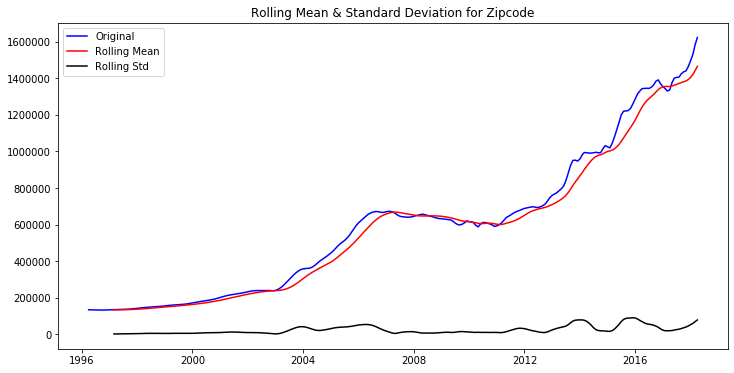

In [270]:
rolling_mean(first)

In [275]:
dickeyfuller(first)

p-value: 0.9986576909330424
Fail to reject the null hypothesis. Data is not stationary.

Results of Dickey-Fuller test: 

Test Statistic                   1.988403
p-value                          0.998658
#Lags Used                      15.000000
Number of Observations Used    249.000000
Critical Value (1%)             -3.456888
Critical Value (5%)             -2.873219
Critical Value (10%)            -2.572994
dtype: float64


After running the Dickey-Fuller test it shows the zipcode 12111 is not stationary. We will take the first difference and test for stationarity again.

## Differencing

In [8]:
diff_first = first.diff().dropna()


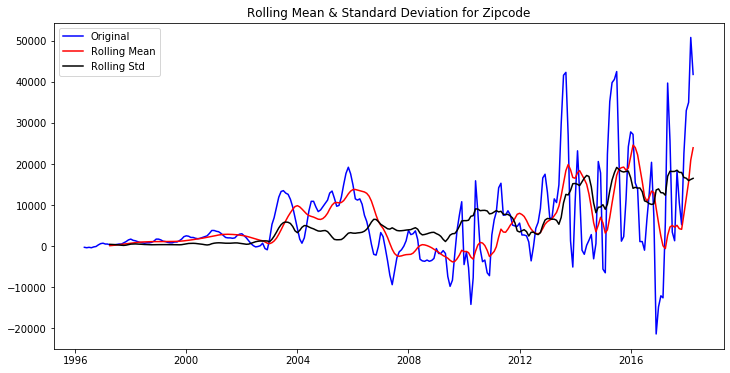

In [276]:
rolling_mean(diff_first)

In [278]:
dickeyfuller(diff_first)

p-value: 0.14715576436846545
Fail to reject the null hypothesis. Data is not stationary.

Results of Dickey-Fuller test: 

Test Statistic                  -2.381053
p-value                          0.147156
#Lags Used                      14.000000
Number of Observations Used    249.000000
Critical Value (1%)             -3.456888
Critical Value (5%)             -2.873219
Critical Value (10%)            -2.572994
dtype: float64


After taking the first difference of the data and plotting the visual we ran the Dickey_Fuller test again and the data is still not stationary. We must difference again. 

##  Second Difference

In [10]:
second_diff_first = diff_first.diff().dropna()


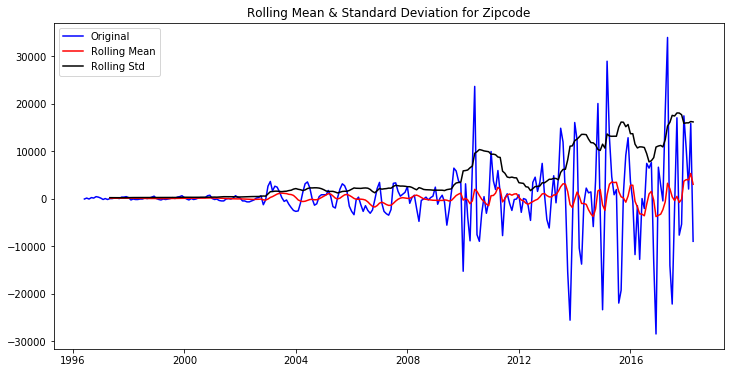

In [279]:
rolling_mean(second_diff_first)

In [280]:
dickeyfuller(second_diff_first)

p-value: 1.1773741124898173e-07
Reject the null hypothesis. Data is stationary.

Results of Dickey-Fuller test: 

Test Statistic                -6.066657e+00
p-value                        1.177374e-07
#Lags Used                     1.300000e+01
Number of Observations Used    2.490000e+02
Critical Value (1%)           -3.456888e+00
Critical Value (5%)           -2.873219e+00
Critical Value (10%)          -2.572994e+00
dtype: float64


After differencing for a second time the data is now stationary. We will now plot the ACF anf PACF to find ideal parameters for the ARIMA model. 

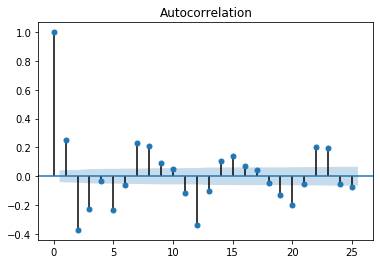

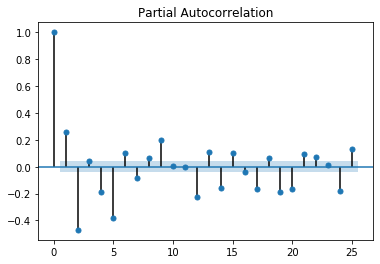

In [299]:
plot_acf_pacf(second_diff_first)

# Greenpoint Zipcode : 11222

In [14]:
second = NY[NY['Zipcode'] == 11222]
second.drop(['Zipcode'], axis=1, inplace=True)

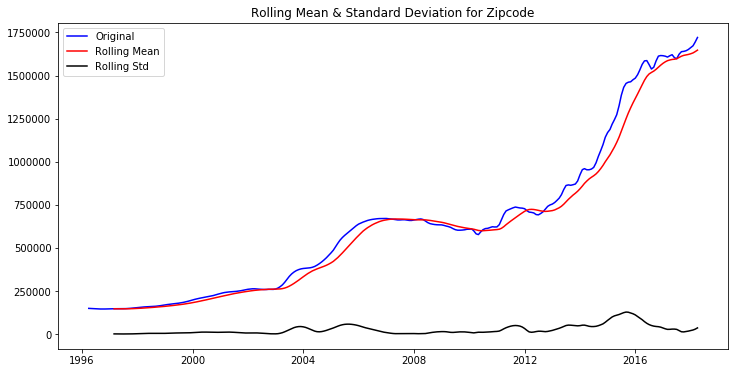

In [281]:
rolling_mean(second)

In [283]:
dickeyfuller(second)

p-value: 0.9945168916750932
Fail to reject the null hypothesis. Data is not stationary.

Results of Dickey-Fuller test: 

Test Statistic                   1.024405
p-value                          0.994517
#Lags Used                      16.000000
Number of Observations Used    248.000000
Critical Value (1%)             -3.456996
Critical Value (5%)             -2.873266
Critical Value (10%)            -2.573019
dtype: float64


We plotted the rolling mean and standard deviation to have a visual if the data is stationary. We also ran a Dickey_Fuller and results indicated the data is not stationary. We must difference. 

## Differencing 

In [17]:
diff_second = second.diff().dropna()


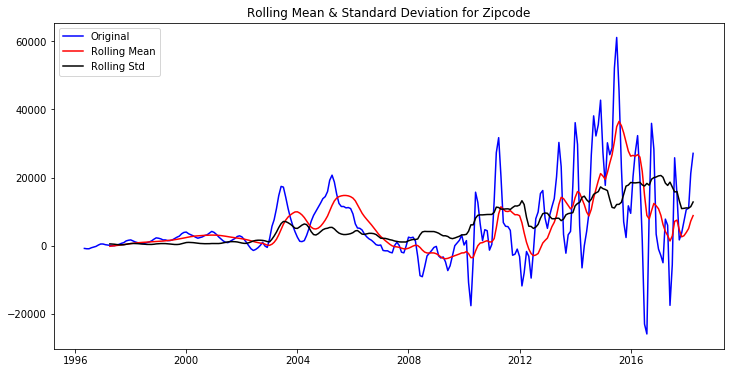

In [285]:
rolling_mean(diff_second)

In [286]:
dickeyfuller(diff_second)

p-value: 0.2753256570685183
Fail to reject the null hypothesis. Data is not stationary.

Results of Dickey-Fuller test: 

Test Statistic                  -2.025918
p-value                          0.275326
#Lags Used                      16.000000
Number of Observations Used    247.000000
Critical Value (1%)             -3.457105
Critical Value (5%)             -2.873314
Critical Value (10%)            -2.573044
dtype: float64


After running a Dickey Fuller test on the differenced data it is still not stationary. Therefore we must difference a second time.

## Differencing a Second time 

In [19]:
second_diff_second = diff_second.diff().dropna()


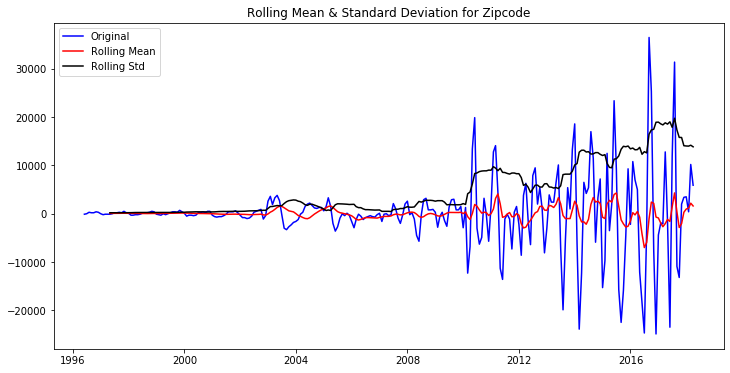

In [287]:
rolling_mean(second_diff_second)

In [289]:
dickeyfuller(second_diff_second)

p-value: 2.5818511123122645e-08
Reject the null hypothesis. Data is stationary.

Results of Dickey-Fuller test: 

Test Statistic                -6.353100e+00
p-value                        2.581851e-08
#Lags Used                     1.500000e+01
Number of Observations Used    2.470000e+02
Critical Value (1%)           -3.457105e+00
Critical Value (5%)           -2.873314e+00
Critical Value (10%)          -2.573044e+00
dtype: float64


Differencing the data twice and running it through a Dickey_Fuller test, the results indicate the data is now stationary. WE can plot the ACT and PACF to find the ideal parameters. 

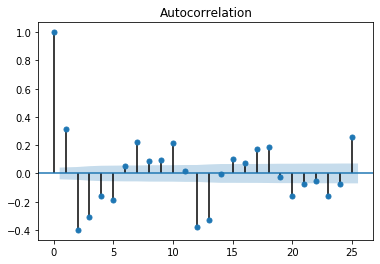

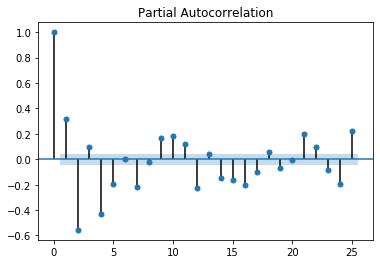

In [298]:
plot_acf_pacf(second_diff_second)

#  Bedford Stuyvesant Zipcode : 11216


In [303]:
third = NY[NY['Zipcode'] == 11216]
third.drop(['Zipcode'], axis=1, inplace=True)

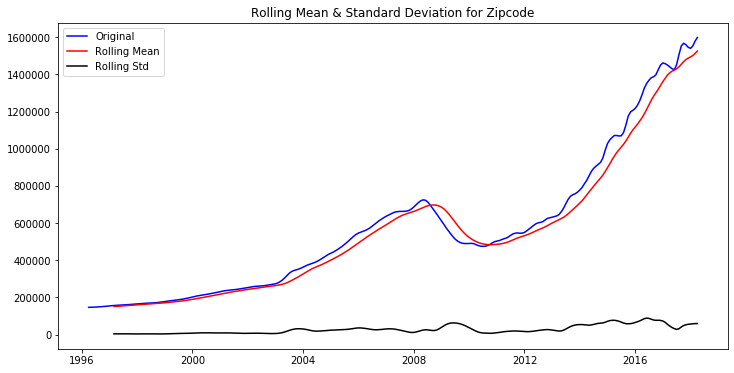

In [290]:
rolling_mean(third)

In [291]:
dickeyfuller(third)

p-value: 0.9724380332622606
Fail to reject the null hypothesis. Data is not stationary.

Results of Dickey-Fuller test: 

Test Statistic                   0.203156
p-value                          0.972438
#Lags Used                      16.000000
Number of Observations Used    248.000000
Critical Value (1%)             -3.456996
Critical Value (5%)             -2.873266
Critical Value (10%)            -2.573019
dtype: float64


The data form the third zipcode does not seem to be stationary, therefore we must difference. 

## Differencing 

In [26]:
diff_third = third.diff().dropna()


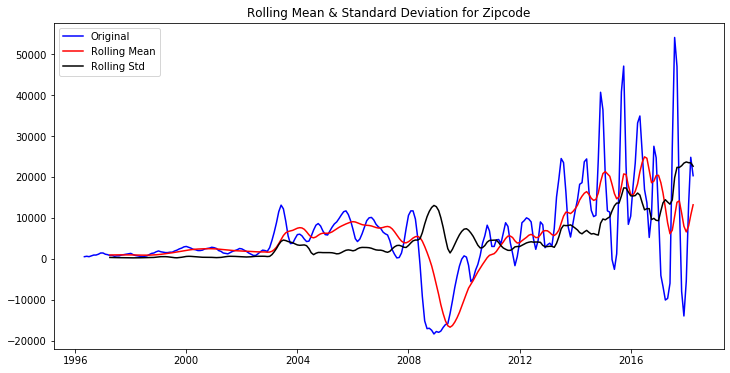

In [292]:
rolling_mean(diff_third)

In [294]:
dickeyfuller(diff_third)

p-value: 0.3685996101349409
Fail to reject the null hypothesis. Data is not stationary.

Results of Dickey-Fuller test: 

Test Statistic                  -1.824028
p-value                          0.368600
#Lags Used                      16.000000
Number of Observations Used    247.000000
Critical Value (1%)             -3.457105
Critical Value (5%)             -2.873314
Critical Value (10%)            -2.573044
dtype: float64


The data does not seem to be stationary after differencing one time. We will difference a second time. 

## Second Difference

In [28]:
second_diff_third = diff_third.diff().dropna()

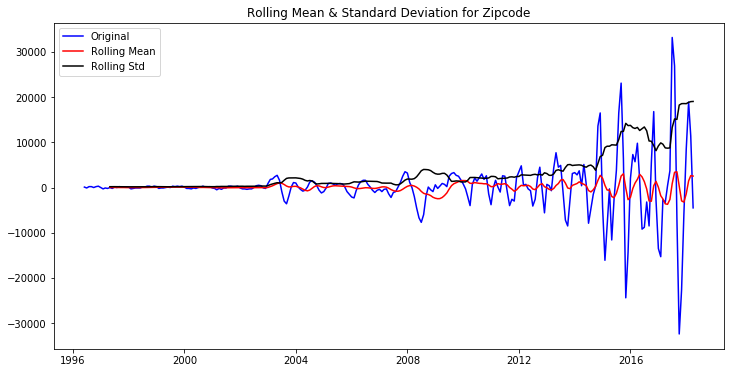

In [295]:
rolling_mean(second_diff_third)

In [296]:
dickeyfuller(second_diff_third)

p-value: 4.496299484176765e-06
Reject the null hypothesis. Data is stationary.

Results of Dickey-Fuller test: 

Test Statistic                  -5.341195
p-value                          0.000004
#Lags Used                      15.000000
Number of Observations Used    247.000000
Critical Value (1%)             -3.457105
Critical Value (5%)             -2.873314
Critical Value (10%)            -2.573044
dtype: float64


After differencing twice the data is now stationary and I can plot the ACF and PACF

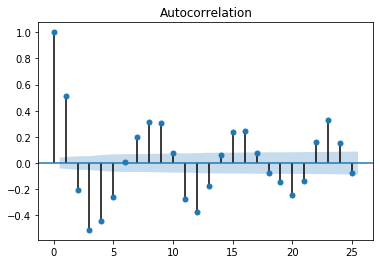

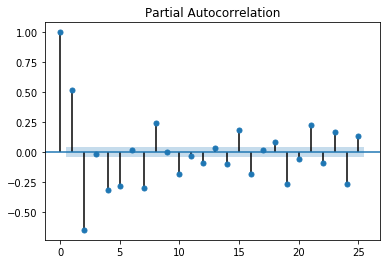

In [300]:
plot_acf_pacf(second_diff_third)

# Modeling 

In [313]:
from numpy import linalg as LA
import numpy as np
LinAlgError = np.linalg.LinAlgError

global summary_df
summary_df = pd.DataFrame(columns = ['Zip', 'Order', 'AIC', 'BIC', 'test_mse', 'test_rmse'])


In [314]:
orders = [(1, 0, 0), (1, 1, 0), (2, 1, 3), (3, 1, 1), (2, 2, 2), (4, 1, 1), (3, 2, 3), (3, 2, 1), (3, 2, 2), (1, 0, 1),
         (1, 1, 1), (2, 1, 1), (4, 2, 3), (4, 4, 4), (4, 3, 3), (1, 2, 2), (2, 2, 1), (0, 0, 0), (2, 1, 2), (2, 1, 0), 
         (3, 1, 0)]
def train_test(df):
    train = df[:'2015-04']
    test = df['2015-05':]
    return train, test


def model_build(zipcode, df, orders):
    train, test = train_test(df)
    for i in orders:
#         print(i)
        try:
            zip_ = zipcode
            order = i
            model = ARIMA(train, order=i)
            fitted = model.fit(disp=-1)
            test_fc, se, conf = fitted.forecast(36, alpha=0.05)
            aic = round(fitted.aic, 2)
            bic = round(fitted.bic, 2)
            test_mse = round(mean_squared_error(test.values, test_fc), 2)
            test_rmse = round(np.sqrt(test_mse), 2)
            global summary_df
            summary_df = summary_df.append({'Zip': zip_, 'Order': str(order), 
                                                      'AIC': aic, 'BIC': bic,
                                                      'test_mse': test_mse, 
                                                      'test_rmse': test_rmse},
                                                     ignore_index=True)
        except (LinAlgError, ValueError):
            continue
        
    return summary_df

In [315]:
def future_predict(zipcode, df, order=(0,0,0)):
    train, test = train_test(df)
    model = ARIMA(train, order=order)
    fit = model.fit()
    april_2018 = round(fit.forecast(36)[0][-1], 2)
    april_2019 = round(fit.forecast(48)[0][-1], 2)
    april_2020 = round(fit.forecast(60)[0][-1], 2)
    april_2021 = round(fit.forecast(72)[0][-1], 2)
    april_2022 = round(fit.forecast(84)[0][-1], 2)
    april_2023 = round(fit.forecast(96)[0][-1], 2)
    april_2024 = round(fit.forecast(108)[0][-1], 2)
    print(zipcode)
    print("April 2018 actual value: ", df.value[-1])
    print("April 2018 forecasted value: ", april_2018)
    print("April 2019 forecasted value: ", april_2019, "ROI: ", april_2019-april_2018)
    print("April 2020 forecasted value: ", april_2020, "ROI: ", april_2020-april_2018)
    print("April 2021 forecasted value: ", april_2021, "ROI: ", april_2021-april_2018)
    print("April 2022 forecasted value: ", april_2022, "ROI: ", april_2022-april_2018)
    print("April 2023 forecasted value: ", april_2023, "ROI: ", april_2023-april_2018)
    print("April 2024 forecasted value: ", april_2024, "ROI: ", april_2024-april_2018)

In [316]:
def best_model(df, order=(0,0,0)):
    train, test = train_test(df)

    no1_model = ARIMA(train, order=order)
    best_fit = no1_model.fit()
    test_fc, se, conf = best_fit.forecast(36, alpha=0.05)

    fc_series = pd.Series(test_fc, index=test.index)

    lower_series = pd.Series(conf[:, 0], index=test.index)
    upper_series = pd.Series(conf[:, 1], index=test.index)
    print(best_fit.summary())
    print('\n')
    print('\n')
    # Plot
    plt.figure(figsize=(12,5), dpi=100)
    plt.plot(train, label='training')
    plt.plot(test, label='actual')
    plt.plot(fc_series, label='forecast')
    plt.fill_between(lower_series.index, lower_series, upper_series, 
                 color='k', alpha=.15)
    plt.title('Forecast vs Actuals')
    plt.legend(loc='upper left', fontsize=8)
    plt.show()

In [349]:
def future_predict(zipcode, df, order=(0,0,0)):
    train, test = train_test(df)
    model = ARIMA(train, order=order)
    fit = model.fit()
    april_2018 = round(fit.forecast(36)[0][-1], 2)
    april_2019 = round(fit.forecast(48)[0][-1], 2)
    april_2020 = round(fit.forecast(60)[0][-1], 2)
    april_2021 = round(fit.forecast(72)[0][-1], 2)
    april_2022 = round(fit.forecast(84)[0][-1], 2)
    april_2023 = round(fit.forecast(96)[0][-1], 2)
    april_2024 = round(fit.forecast(108)[0][-1], 2)
    
    
    
    ROI_2019 = round(april_2019-april_2018, 2)
    ROI_2020 =round(april_2020-april_2018, 2)
    ROI_2021 =round(april_2021-april_2018, 2)
    ROI_2022 = round(april_2022-april_2018, 2)
    ROI_2023 = round(april_2023-april_2018, 2)
    ROI_2024 =  round(april_2024-april_2018, 2)
    
    
    dictionary1 = {'2019-04': ROI_2019, '2020-04': ROI_2020, '2021-04': ROI_2021,
                 '2022-04': ROI_2022, '2023-04':ROI_2023,'2024-04': ROI_2024} 
    dictionary = {'2018-04': april_2018, '2019-04': april_2019, '2020-04': april_2020, '2021-04': april_2021,
                 '2022-04': april_2022, '2023-04': april_2023, '2024-04': april_2024}
    

    dataframe = pd.DataFrame(dictionary.values(), index=dictionary.keys(), columns=['Predict_Value'])

    dataframe.plot(kind='bar', title="Future Home Values", figsize=(8, 4), color ='coral').get_figure().savefig('prediction.png',dpi=None,bbox_inches = 'tight')
   
    dataframe1 = pd.DataFrame(dictionary1.values(), index=dictionary1.keys(), columns=['ROI'])

    dataframe1.plot(kind='bar', title="Return on Investment", figsize=(8, 4), color='mediumaquamarine').get_figure().savefig('prediciton.png',dpi=None,bbox_inches = 'tight')
    
    
    print(zipcode)
    print("April 2018 actual value: ", df.value[-1])
    print("April 2018 forecasted value: ", april_2018)
    print("April 2019 forecasted value: ", april_2019, ", ROI: ", round(april_2019-april_2018, 2))
    print("April 2020 forecasted value: ", april_2020, ", ROI: ", round(april_2020-april_2018, 2))
    print("April 2021 forecasted value: ", april_2021, ", ROI: ", round(april_2021-april_2018, 2))
    print("April 2022 forecasted value: ", april_2022, ", ROI: ", round(april_2022-april_2018, 2))
    print("April 2023 forecasted value: ", april_2023, ", ROI: ", round(april_2023-april_2018, 2))
    print("April 2024 forecasted value: ", april_2024, ", ROI: ", round(april_2024-april_2018, 2))

In [335]:
def graph_annual(zipcode, df):
    ttl_year = df['1997-01':'2017-12']
    annual = ttl_year.groupby(pd.Grouper(freq = 'A'))
    annual_df = pd.DataFrame()
    for yr, group in annual:
        annual_df[yr.year] = group.values.ravel()
    annual_df.plot(figsize = (30,20), subplots=False, legend=True, fontsize = 18)
    plt.title(("Zip ", zipcode, " Annual Selling 1997-2017"), fontsize=30)
    plt.legend(fontsize=14, loc=1) ;
    plt.savefig('annualgraph.png',dpi=None,bbox_inches = 'tight')

In [319]:
model_build('11211', first, orders)
model_build('11222', second, orders)
model_build('11216', third, orders)

,Zip,Order,AIC,BIC,test_mse,test_rmse
0,11211,"(1, 0, 0)",4837.85,4848.15,8.869835e+10,297822.68
1,11211,"(1, 1, 0)",4530.75,4541.04,9.240997e+09,96130.10
2,11211,"(2, 1, 3)",5398.76,5422.76,1.875621e+09,43308.44
3,11211,"(3, 1, 1)",4421.50,4442.08,2.290730e+10,151351.56
4,11211,"(2, 2, 2)",4413.07,4433.62,7.070915e+09,84088.73
5,11211,"(4, 1, 1)",4423.36,4447.37,2.387964e+10,154530.40
6,11211,"(3, 2, 1)",4417.48,4438.03,1.979311e+10,140687.97
7,11211,"(3, 2, 2)",4404.26,4428.23,7.651818e+09,87474.67
8,11211,"(1, 1, 1)",4449.18,4462.89,2.240749e+10,149691.31
9,11211,"(2, 1, 1)",4444.99,4462.14,3.024783e+10,173919.03


In [320]:
first_zipcode = summary_df[summary_df['Zip'] == '11211']
second_zipcode = summary_df[summary_df['Zip'] == '11222'] 
third_zipcode = summary_df[summary_df['Zip'] == '11216']

## Model for Zipcode : 11211 - Williamsburg

For the first zipcode we ran the zipcode through the function to ouput results for each order. Using the results we will pick the ideal order to run through a model

In [321]:
first_zipcode

,Zip,Order,AIC,BIC,test_mse,test_rmse
0,11211,"(1, 0, 0)",4837.85,4848.15,8.869835e+10,297822.68
1,11211,"(1, 1, 0)",4530.75,4541.04,9.240997e+09,96130.10
2,11211,"(2, 1, 3)",5398.76,5422.76,1.875621e+09,43308.44
3,11211,"(3, 1, 1)",4421.50,4442.08,2.290730e+10,151351.56
4,11211,"(2, 2, 2)",4413.07,4433.62,7.070915e+09,84088.73
5,11211,"(4, 1, 1)",4423.36,4447.37,2.387964e+10,154530.40
6,11211,"(3, 2, 1)",4417.48,4438.03,1.979311e+10,140687.97
7,11211,"(3, 2, 2)",4404.26,4428.23,7.651818e+09,87474.67
8,11211,"(1, 1, 1)",4449.18,4462.89,2.240749e+10,149691.31
9,11211,"(2, 1, 1)",4444.99,4462.14,3.024783e+10,173919.03


In [322]:
first_zipcode.sort_values('AIC', axis=0, ascending=True)[:3]


,Zip,Order,AIC,BIC,test_mse,test_rmse
10,11211,"(4, 2, 3)",4365.66,4396.49,3.627003e+09,60224.60
14,11211,"(2, 1, 2)",4386.27,4406.84,3.132769e+10,176996.29
7,11211,"(3, 2, 2)",4404.26,4428.23,7.651818e+09,87474.67


In [330]:
first_zipcode.sort_values('test_rmse', axis=0, ascending=True)[:3]

,Zip,Order,AIC,BIC,test_mse,test_rmse
2,11211,"(2, 1, 3)",5398.76,5422.76,1.875621e+09,43308.44
10,11211,"(4, 2, 3)",4365.66,4396.49,3.627003e+09,60224.60
11,11211,"(1, 2, 2)",4429.87,4446.99,3.668117e+09,60564.98


After deciding which order seem to be the most ideal it seems to be(1,2,2). We decided based on the lowest AIC value and RSME value. This order did not give us the lowest AIC but the RSME is the lowest. We will use it to fit in the model.

                             ARIMA Model Results                              
Dep. Variable:               D2.value   No. Observations:                  227
Model:                 ARIMA(1, 2, 2)   Log Likelihood               -2209.935
Method:                       css-mle   S.D. of innovations           4078.631
Date:                Thu, 07 May 2020   AIC                           4429.869
Time:                        13:19:14   BIC                           4446.994
Sample:                    06-01-1996   HQIC                          4436.779
                         - 04-01-2015                                         
                     coef    std err          z      P>|z|      [0.025      0.975]
----------------------------------------------------------------------------------
const             58.0465     62.189      0.933      0.351     -63.841     179.934
ar.L1.D2.value     0.5400      0.078      6.883      0.000       0.386       0.694
ma.L1.D2.value    -0.2706      0.057

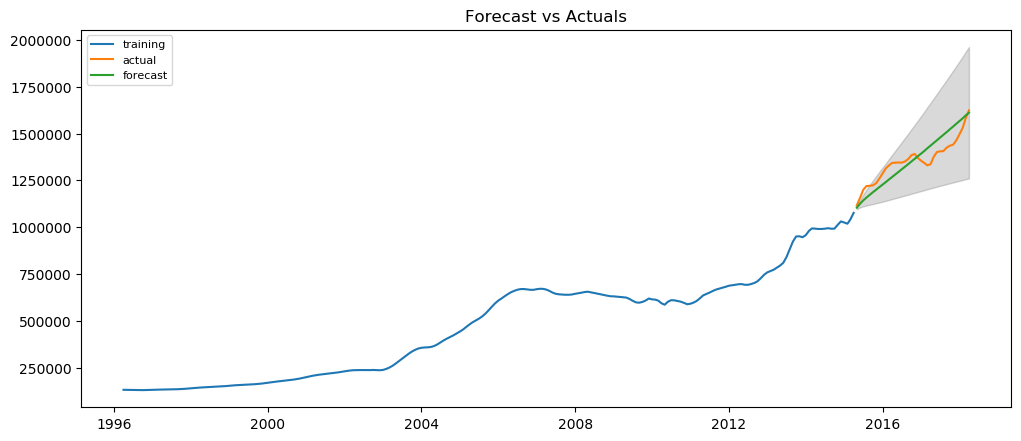

In [329]:
best_model(first, order=(1, 2, 2))

According to the summary we can see the coefficients are significant. Looking at the graph the predictions seem to be  close to the actuals as there is a positive slope. Williamsburg, Brooklyn seems to have a an increase of value homes for future years. It seems like a good idea to invest.  

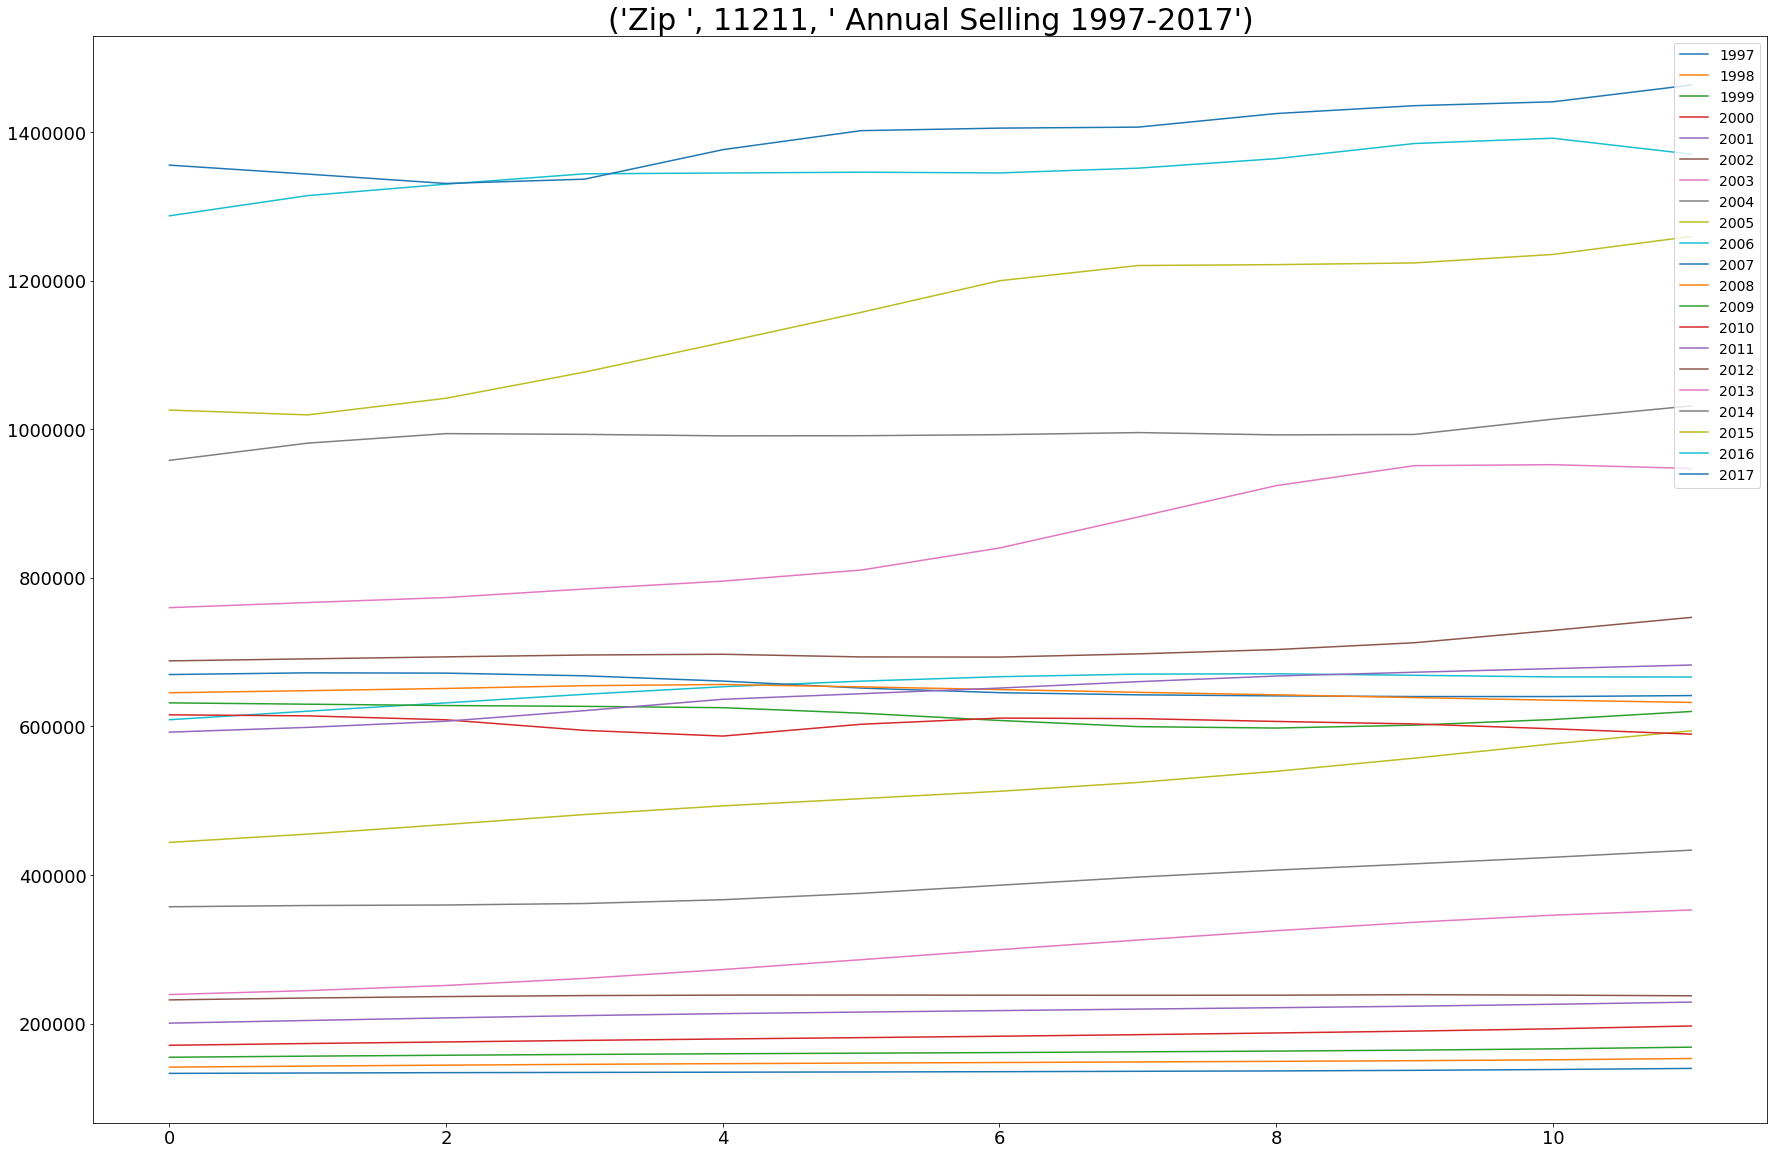

In [356]:
graph_annual(11211,first)

Above is a visual presentation of the annual value for the zipcode

## Model for Zipcode : 11222 Greenpoint

In [326]:
second_zipcode

,Zip,Order,AIC,BIC,test_mse,test_rmse
17,11222,"(1, 0, 0)",4910.49,4920.79,1.105571e+11,332501.21
18,11222,"(1, 1, 0)",4515.08,4525.36,1.199286e+10,109511.91
19,11222,"(2, 1, 3)",4341.16,4365.17,1.662817e+10,128950.25
20,11222,"(3, 1, 1)",4401.41,4421.99,3.548783e+10,188382.15
21,11222,"(2, 2, 2)",4347.81,4368.36,1.029933e+10,101485.63
22,11222,"(4, 1, 1)",4395.62,4419.62,5.055173e+10,224837.11
23,11222,"(3, 2, 3)",4324.31,4351.71,1.642577e+10,128163.06
24,11222,"(3, 2, 1)",4396.13,4416.68,1.167831e+10,108066.21
25,11222,"(3, 2, 2)",4341.58,4365.56,9.435570e+09,97136.86
26,11222,"(2, 1, 1)",4415.29,4432.43,4.602364e+10,214531.22


In [327]:
second_zipcode.sort_values('AIC', axis=0, ascending=True)[:3]


,Zip,Order,AIC,BIC,test_mse,test_rmse
23,11222,"(3, 2, 3)",4324.31,4351.71,1.642577e+10,128163.06
19,11222,"(2, 1, 3)",4341.16,4365.17,1.662817e+10,128950.25
25,11222,"(3, 2, 2)",4341.58,4365.56,9.435570e+09,97136.86


In [102]:
second_zipcode.sort_values('test_rmse', axis=0, ascending=True)[:4]

,Zip,Order,AIC,BIC,test_mse,test_rmse
25,11222,"(3, 2, 2)",4341.58,4365.56,9.435570e+09,97136.86
21,11222,"(2, 2, 2)",4347.81,4368.36,1.029933e+10,101485.63
24,11222,"(3, 2, 1)",4396.13,4416.68,1.167831e+10,108066.21
18,11222,"(1, 1, 0)",4515.08,4525.36,1.199286e+10,109511.91


For the second zipcode I ran the zipcode through the function to ouput results for each order. Using the results I will pick the ideal order (3,2,2) to run through a model. We based the results on choosing hthe order with the lowest RSME, while it is not the one with the lowest AIC order (3,2,3) has a trememdously large RSME. 

                             ARIMA Model Results                              
Dep. Variable:               D2.value   No. Observations:                  227
Model:                 ARIMA(3, 2, 2)   Log Likelihood               -2163.790
Method:                       css-mle   S.D. of innovations           3267.934
Date:                Wed, 06 May 2020   AIC                           4341.581
Time:                        18:14:28   BIC                           4365.555
Sample:                    06-01-1996   HQIC                          4351.255
                         - 04-01-2015                                         
                     coef    std err          z      P>|z|      [0.025      0.975]
----------------------------------------------------------------------------------
const             74.2870    326.876      0.227      0.820    -566.378     714.952
ar.L1.D2.value    -0.7462      0.066    -11.248      0.000      -0.876      -0.616
ar.L2.D2.value    -0.4901      0.077

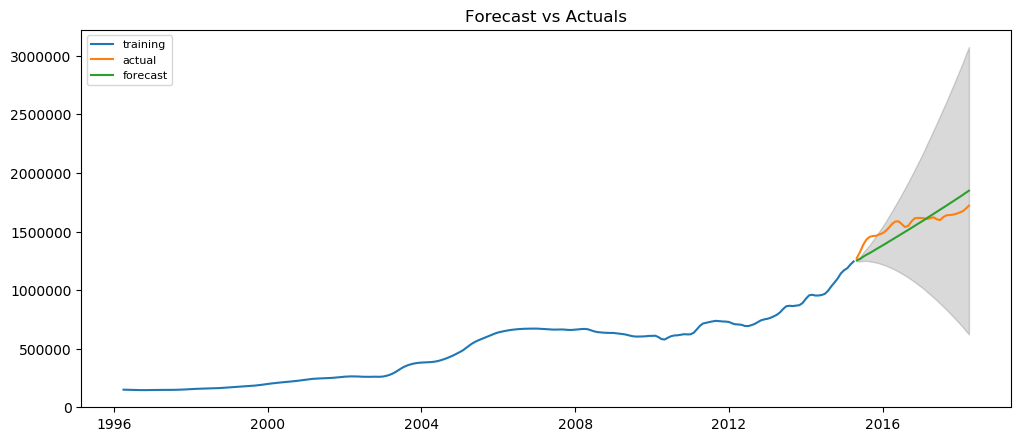

In [104]:
best_model(second, order=(3, 2, 2))

According to the model the predictions seems to be performing better than the actuals. Both have a postive slope but it seems the predition values are increasing at a faster rate than the values. In the end results Greenpoint still seems to have value home increasing in future years.

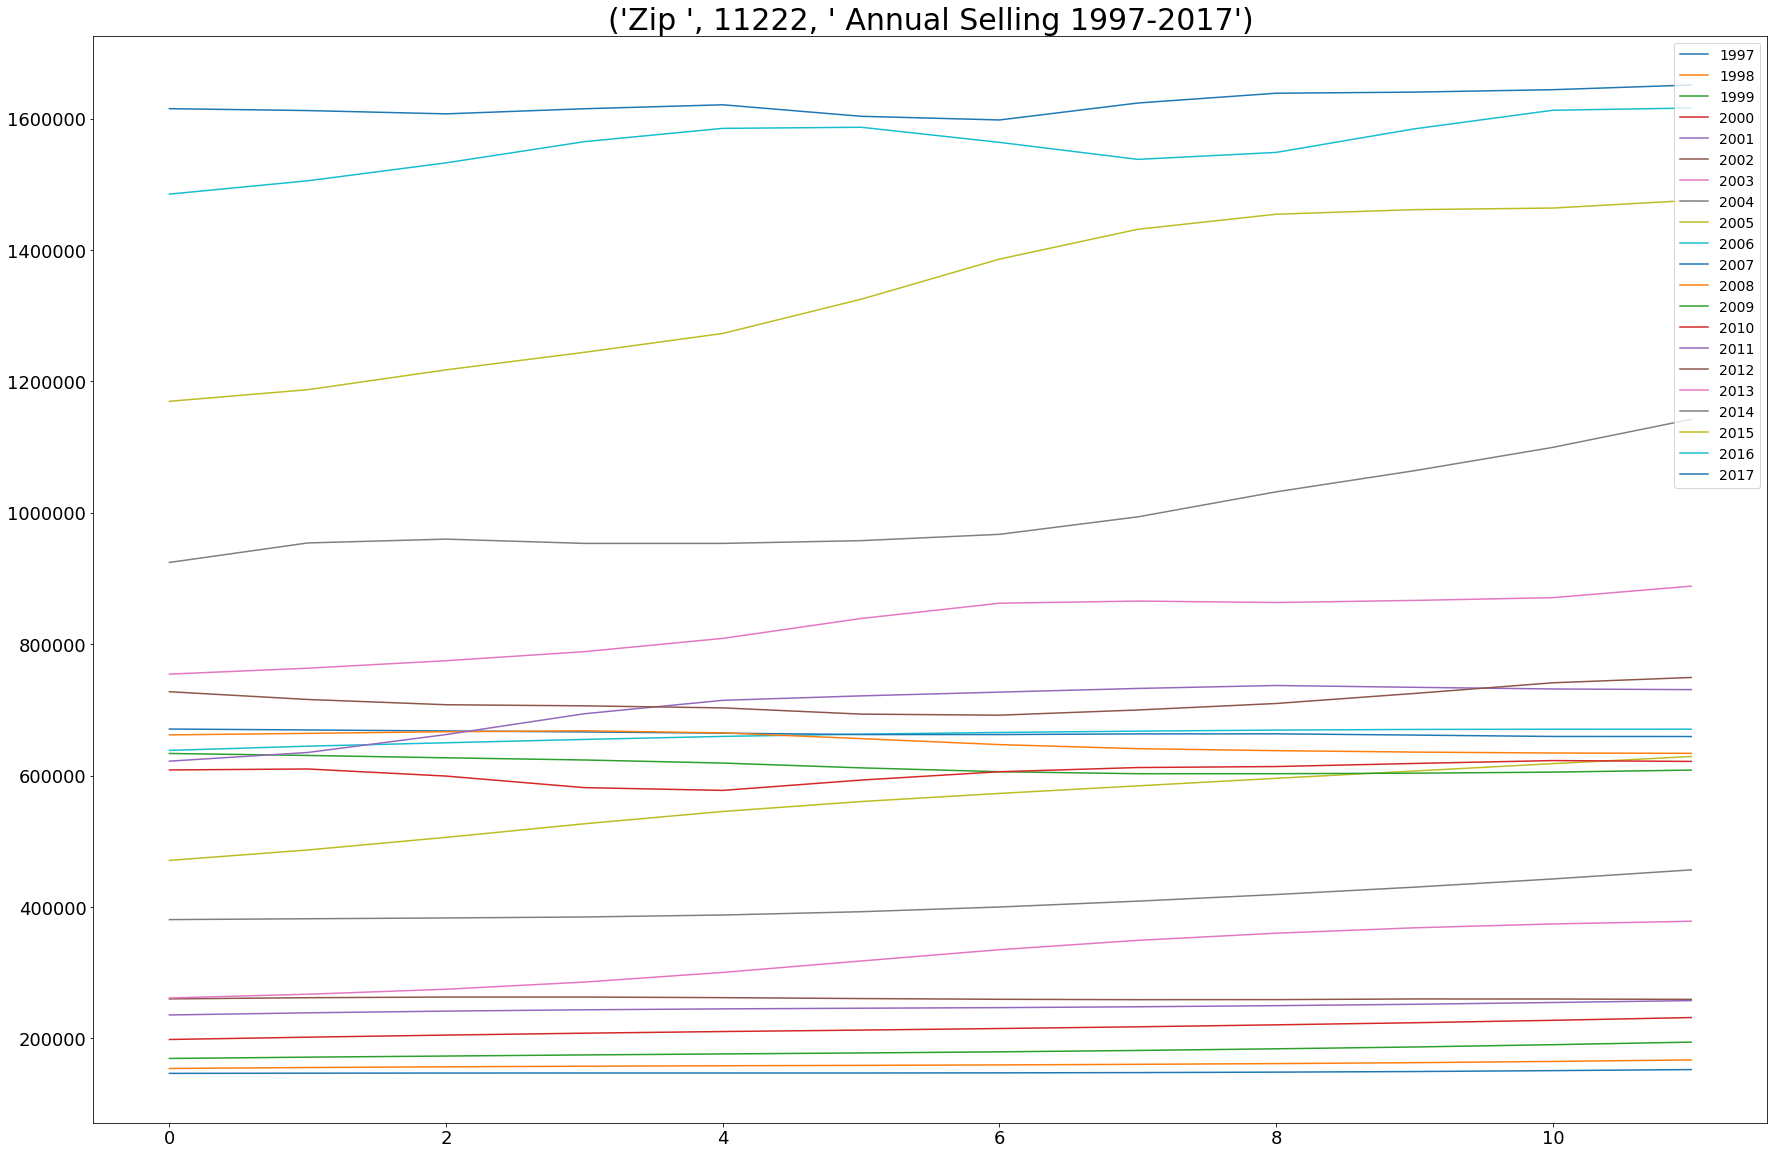

In [357]:
graph_annual(11222,second)

## Model for Zipcode : 	11216  Bedford Stuyvesant

In [105]:
third_zipcode

,Zip,Order,AIC,BIC,test_mse,test_rmse
34,11216,"(1, 0, 0)",4839.89,4850.19,1.134816e+11,336870.25
35,11216,"(1, 1, 0)",4270.14,4280.42,3.267162e+10,180752.92
36,11216,"(3, 1, 1)",4092.80,4113.37,3.293841e+10,181489.43
37,11216,"(2, 2, 2)",4072.15,4092.70,1.298018e+10,113930.59
38,11216,"(4, 1, 1)",4094.79,4118.80,3.249205e+10,180255.53
39,11216,"(3, 2, 3)",4036.65,4064.05,3.346283e+09,57847.06
40,11216,"(3, 2, 1)",4082.23,4102.78,2.215083e+09,47064.67
41,11216,"(3, 2, 2)",4073.36,4097.34,9.596497e+09,97961.71
42,11216,"(2, 1, 1)",4104.75,4121.90,4.655286e+10,215761.12
43,11216,"(4, 2, 3)",4033.49,4064.31,8.377067e+09,91526.32


In [106]:
third_zipcode.sort_values('AIC', axis=0, ascending=True)[:3]


,Zip,Order,AIC,BIC,test_mse,test_rmse
43,11216,"(4, 2, 3)",4033.49,4064.31,8.377067e+09,91526.32
39,11216,"(3, 2, 3)",4036.65,4064.05,3.346283e+09,57847.06
46,11216,"(2, 1, 2)",4054.60,4075.17,4.781782e+10,218672.85


In [107]:
third_zipcode.sort_values('test_rmse', axis=0, ascending=True)[:3]


,Zip,Order,AIC,BIC,test_mse,test_rmse
44,11216,"(2, 2, 1)",4081.09,4098.22,1.840315e+09,42898.89
40,11216,"(3, 2, 1)",4082.23,4102.78,2.215083e+09,47064.67
39,11216,"(3, 2, 3)",4036.65,4064.05,3.346283e+09,57847.06


For the third zipcode I ran the zipcode through the function to ouput results for each order. Using the results I will pick the ideal order (2,1,1) to run through an ARIMA model.

                             ARIMA Model Results                              
Dep. Variable:               D2.value   No. Observations:                  227
Model:                 ARIMA(2, 2, 1)   Log Likelihood               -2035.547
Method:                       css-mle   S.D. of innovations           1891.882
Date:                Wed, 06 May 2020   AIC                           4081.094
Time:                        18:17:05   BIC                           4098.218
Sample:                    06-01-1996   HQIC                          4088.004
                         - 04-01-2015                                         
                     coef    std err          z      P>|z|      [0.025      0.975]
----------------------------------------------------------------------------------
const             64.3443    216.520      0.297      0.766    -360.026     488.715
ar.L1.D2.value     0.5737      0.088      6.509      0.000       0.401       0.746
ar.L2.D2.value    -0.4059      0.076

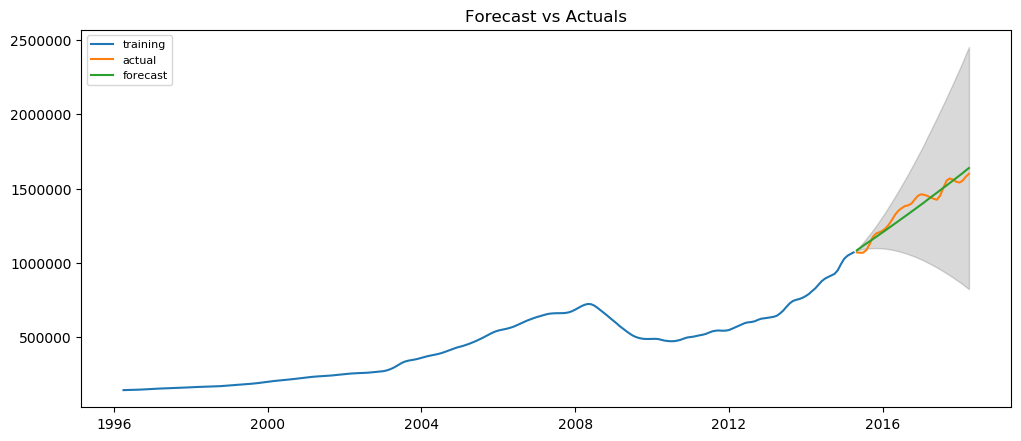

In [108]:
best_model(third,order=(2,2,1))

From the predicted values we can see the forecasted value is close to the actual value. 

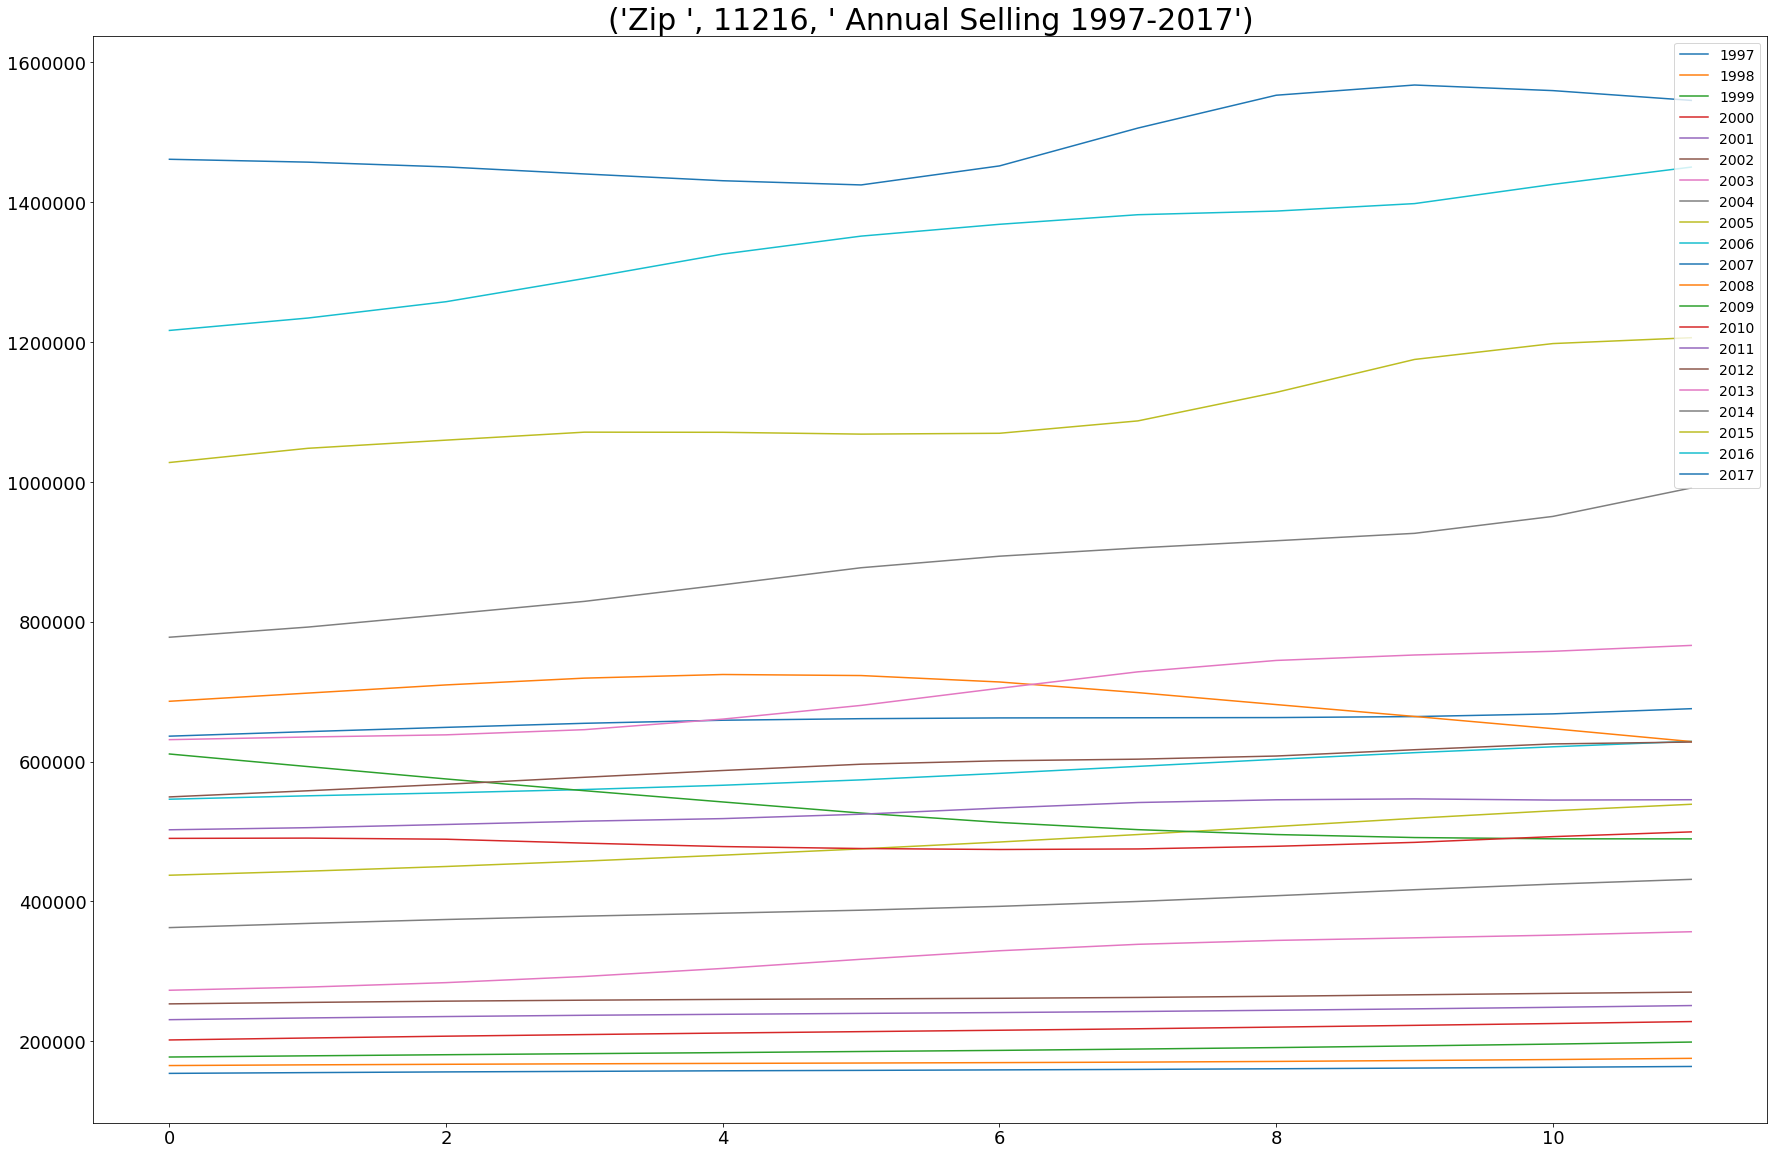

In [358]:
graph_annual(11216,third)

# Future Prediction of Home Values

## Williamsburg, Brooklyn 11211

11211
April 2018 actual value:  1623700.0
April 2018 forecasted value:  1611459.98
April 2019 forecasted value:  1795557.35 , ROI:  184097.37
April 2020 forecasted value:  1988013.43 , ROI:  376553.45
April 2021 forecasted value:  2188828.2 , ROI:  577368.22
April 2022 forecasted value:  2398001.67 , ROI:  786541.69
April 2023 forecasted value:  2615533.83 , ROI:  1004073.85
April 2024 forecasted value:  2841424.7 , ROI:  1229964.72


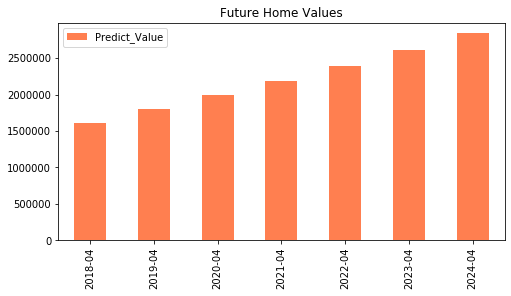

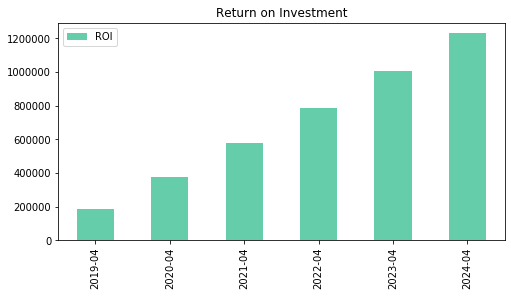

In [359]:
future_predict('11211',first,order=(1,2,2))

Williamsburg has an increase of value throughout the years! By 2024 the average home price seems to be around 2.8 million dollar . 
The return on investment is around 1.2 million!

## Greenpoint, Brooklyn 11221

11222
April 2018 actual value:  1721100.0
April 2018 forecasted value:  1848516.78
April 2019 forecasted value:  2073686.68 , ROI:  225169.9
April 2020 forecasted value:  2309553.9 , ROI:  461037.12
April 2021 forecasted value:  2556118.46 , ROI:  707601.68
April 2022 forecasted value:  2813380.36 , ROI:  964863.58
April 2023 forecasted value:  3081339.58 , ROI:  1232822.8
April 2024 forecasted value:  3359996.13 , ROI:  1511479.35


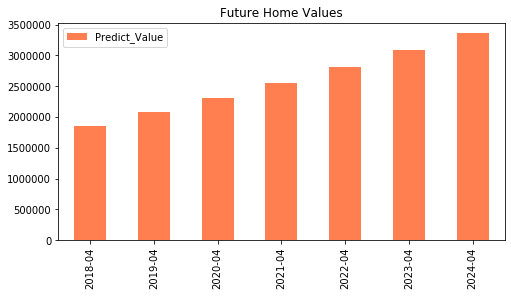

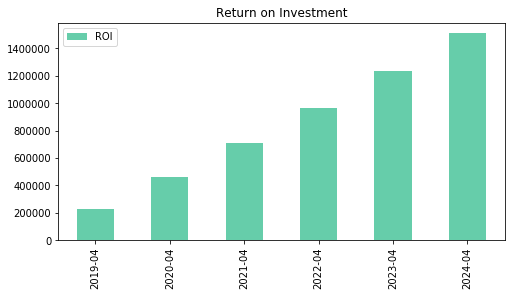

In [360]:
future_predict('11222',second,order=(3, 2, 2))

In the neighborhood Greenpoint there seems to also be an increase in value. By 2024 the average value of a home would be 3.4 million dollars. The return investment of buying a home in 2018 and selling in 2024 is around 1.5 million!

## Bedford Stuyvesant, Brooklyn 11216

11216
April 2018 actual value:  1598700.0
April 2018 forecasted value:  1637582.71
April 2019 forecasted value:  1844669.51 , ROI:  207086.8
April 2020 forecasted value:  2061021.91 , ROI:  423439.2
April 2021 forecasted value:  2286639.88 , ROI:  649057.17
April 2022 forecasted value:  2521523.45 , ROI:  883940.74
April 2023 forecasted value:  2765672.6 , ROI:  1128089.89
April 2024 forecasted value:  3019087.33 , ROI:  1381504.62


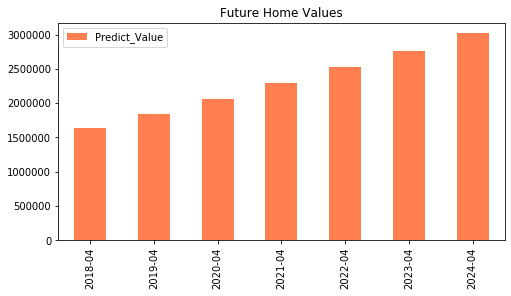

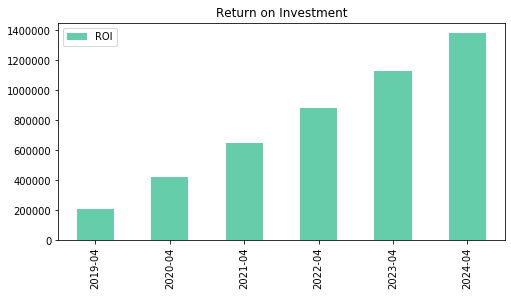

In [361]:
future_predict('11216',third,order=(2, 2, 1))

In the neighborhood of Bedford the average value of a home in 2024 will be about 3 million. The return investment of buying a home in 2018 and selling in 2024 will result in 1.4 million dollars! 

In conclusion, we can see Greenpoint will result in the highest return rate in 2024 but also has the highest average home value. Time to buy a home!